In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import zscore

In [2]:
os.getcwd()

'/home/stephen/phd/modelling/pipeline/workflow/scripts'

In [3]:
plt.rcParams["figure.figsize"] = (20,10)

In [7]:
TUpairStats = pd.read_csv('/media/stephen/Data/modelling/analysisSynthetic/exampleSynthetic/3000/merged/exampleSynthetic-TU-pairStats.csv.gz')
TUpairStats['TUpair'] = TUpairStats['TU1'].astype(str) + '-' + TUpairStats['TU2'].astype(str)
TUpairStats = TUpairStats.loc[TUpairStats['TU1'] != TUpairStats['TU2']]
TUpairStats = TUpairStats.loc[TUpairStats['TADstatus'].isin(['sameTAD', 'sameNotTAD', 'adjacentBoundary'])]

In [8]:
# Z score normalise by TUpair
TUpairStats['r'] = TUpairStats.groupby(['TUpair'])['r'].transform(lambda x : zscore(x,ddof=1))

Text(0, 0.5, 'Z-score transformed Pearson correlation (r) by TUpair')

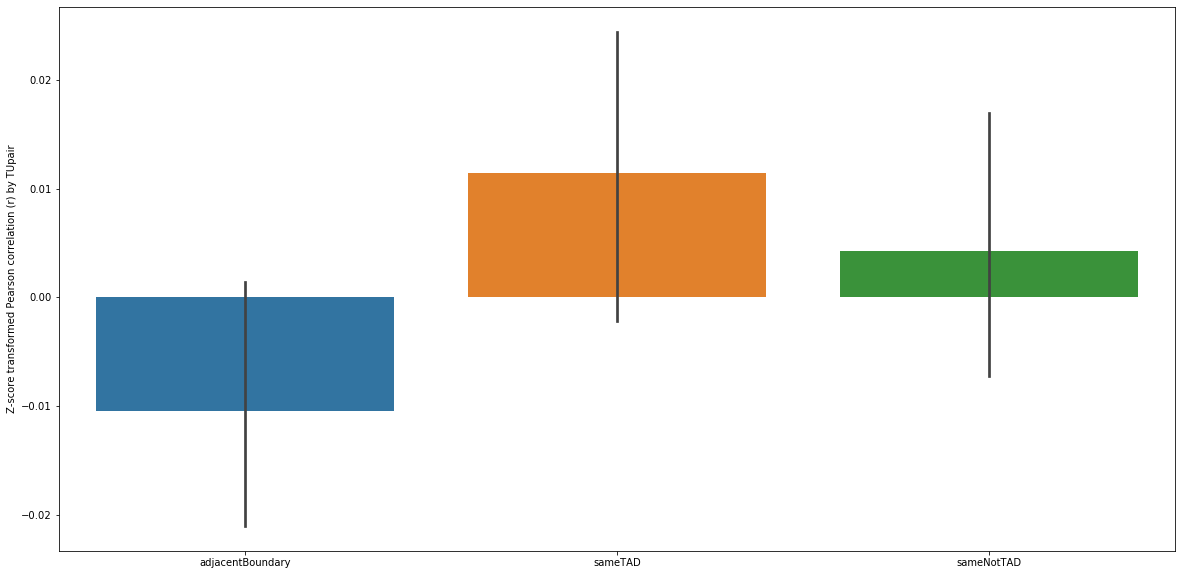

In [9]:
fig, ax = plt.subplots()
ax = sns.barplot(x="TADstatus", y="r", ci=95, data=TUpairStats, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Z-score transformed Pearson correlation (r) by TUpair')

Text(0, 0.5, 'Pearson correlation (r)')

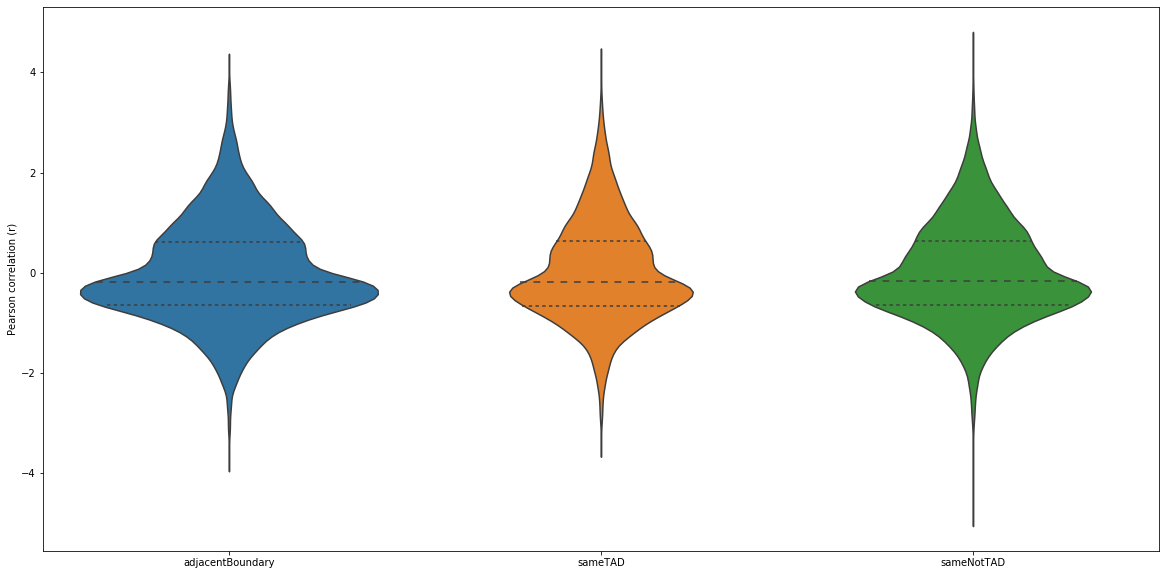

In [155]:
fig, ax = plt.subplots()
sns.violinplot(x="TADstatus", y="r", kind="violin", scale="count", inner="quartile", data=TUpairStats, ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Pearson correlation (r)')